# QQQ/TQQQ Trading Strategy

This notebook implements a leveraged ETF rotation strategy between QQQ and TQQQ based on moving averages:
- **Switch to TQQQ** (3x leveraged): When QQQ drops below its 120-day moving average
- **Switch to QQQ** (unleveraged): When QQQ rises above its 30-day moving average

# QQQ/TQQQ Trading Strategy

This notebook implements a leveraged ETF rotation strategy between QQQ and TQQQ based on moving averages:
- **Switch to TQQQ** (3x leveraged): When QQQ drops below its 120-day moving average
- **Switch to QQQ** (unleveraged): When QQQ rises above its 30-day moving average

## 1. Import Required Libraries

Import essential libraries for data analysis, visualization, and trading strategy development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Market Data

Load historical price data for QQQ and TQQQ using yfinance.

In [2]:
# Download QQQ and TQQQ data
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

print("Downloading QQQ and TQQQ data...")
qqq = yf.download('QQQ', start=start_date, end=end_date, progress=False, auto_adjust=True)
tqqq = yf.download('TQQQ', start=start_date, end=end_date, progress=False, auto_adjust=True)

# Check if data was downloaded successfully
if qqq.empty or tqqq.empty:
    raise ValueError("Failed to download data. Please check your internet connection and try again.")

# Extract Close prices (handle MultiIndex columns from yfinance)
if isinstance(qqq.columns, pd.MultiIndex):
    qqq_close = qqq[('Close', 'QQQ')]
    tqqq_close = tqqq[('Close', 'TQQQ')]
else:
    qqq_close = qqq['Close']
    tqqq_close = tqqq['Close']

# Create combined dataframe
df = pd.DataFrame({
    'QQQ_Close': qqq_close,
    'TQQQ_Close': tqqq_close,
})

# Calculate returns
df['QQQ_Returns'] = df['QQQ_Close'].pct_change()
df['TQQQ_Returns'] = df['TQQQ_Close'].pct_change()

# Drop NaN values
df.dropna(inplace=True)

print(f"Loaded {len(df)} days of data from {df.index[0].date()} to {df.index[-1].date()}")
print(f"\nQQQ: ${df['QQQ_Close'].iloc[0]:.2f} → ${df['QQQ_Close'].iloc[-1]:.2f}")
print(f"TQQQ: ${df['TQQQ_Close'].iloc[0]:.2f} → ${df['TQQQ_Close'].iloc[-1]:.2f}")
df.head()

Loaded 1490 days of data from 2020-01-03 to 2025-12-05

QQQ: $206.94 → $625.48
TQQQ: $10.58 → $56.15
Loaded 1490 days of data from 2020-01-03 to 2025-12-05

QQQ: $206.94 → $625.48
TQQQ: $10.58 → $56.15


,QQQ_Close,TQQQ_Close,QQQ_Returns,TQQQ_Returns
Date,,,,
2020-01-03,206.935898,10.584586,-0.009160,-0.027191
2020-01-06,208.269211,10.785807,0.006443,0.019011
2020-01-07,208.240250,10.772634,-0.000139,-0.001221
2020-01-08,209.805466,11.020569,0.007516,0.023015
2020-01-09,211.583237,11.298450,0.008473,0.025215


## 3. Calculate Moving Averages

Calculate the 30-day and 120-day moving averages for QQQ.

In [3]:
# Calculate moving averages for QQQ
df['QQQ_SMA_30'] = df['QQQ_Close'].rolling(window=30).mean()
df['QQQ_SMA_120'] = df['QQQ_Close'].rolling(window=120).mean()

# Drop NaN values from rolling calculations
df.dropna(inplace=True)

print("Moving averages calculated")
print(f"\nCurrent QQQ Price: ${df['QQQ_Close'].iloc[-1]:.2f}")
print(f"Current 30-day MA: ${df['QQQ_SMA_30'].iloc[-1]:.2f}")
print(f"Current 120-day MA: ${df['QQQ_SMA_120'].iloc[-1]:.2f}")
df[['QQQ_Close', 'QQQ_SMA_30', 'QQQ_SMA_120', 'TQQQ_Close']].tail(10)

Moving averages calculated

Current QQQ Price: $625.48
Current 30-day MA: $616.08
Current 120-day MA: $585.09


,QQQ_Close,QQQ_SMA_30,QQQ_SMA_120,TQQQ_Close
Date,,,,
2025-11-21,590.070007,612.295998,578.470786,47.480000
2025-11-24,605.159973,612.400997,579.117408,51.080002
2025-11-25,608.890015,612.763997,579.828206,52.009998
2025-11-26,614.270020,613.165666,580.541184,53.369999
2025-11-28,619.250000,613.807666,581.289177,54.540001
2025-12-01,617.169983,614.248999,581.990653,54.049999
2025-12-02,622.000000,614.597666,582.747346,55.299999
2025-12-03,623.520020,615.002334,583.506312,55.689999
2025-12-04,622.940002,615.584001,584.316150,55.509998


## 4. Visualize QQQ Price and Moving Averages

Plot QQQ price with the 30-day and 120-day moving averages.

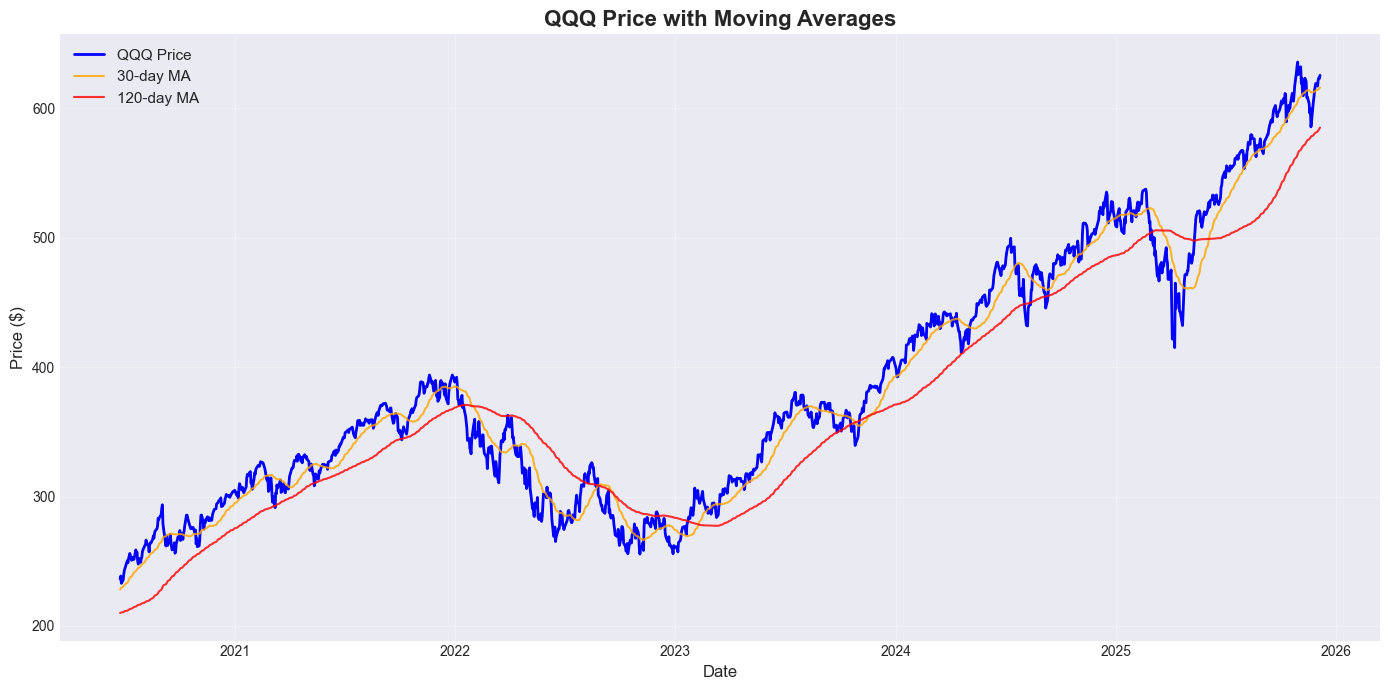

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot QQQ price and moving averages
ax.plot(df.index, df['QQQ_Close'], label='QQQ Price', linewidth=2, color='blue')
ax.plot(df.index, df['QQQ_SMA_30'], label='30-day MA', linewidth=1.5, color='orange', alpha=0.8)
ax.plot(df.index, df['QQQ_SMA_120'], label='120-day MA', linewidth=1.5, color='red', alpha=0.8)

# Add legend and labels
ax.set_title('QQQ Price with Moving Averages', fontsize=16, fontweight='bold')
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Implement QQQ/TQQQ Rotation Strategy

**Strategy Rules:**
- Hold **TQQQ** when 30-day MA is above 120-day MA AND price is above 30-day MA (strong uptrend)
- Hold **QQQ** when 30-day MA is above 120-day MA BUT price drops below 30-day MA (uptrend with correction)
- Hold **Cash** when 30-day MA is below 120-day MA (downtrend - stay out of market)
- This aims to use leverage during strong uptrends while protecting capital during downtrends

In [8]:
# Initialize position: 0 = QQQ, 1 = TQQQ, -1 = Cash
df['Position'] = -1  # Start with Cash

# Determine position based on rules
for i in range(len(df)):
    current_price = df['QQQ_Close'].iloc[i]
    sma_30 = df['QQQ_SMA_30'].iloc[i]
    sma_120 = df['QQQ_SMA_120'].iloc[i]
    
    if sma_30 > sma_120:
        # 30-day MA above 120-day MA (uptrend)
        if current_price >= sma_30:
            # Price above 30-day MA: Buy TQQQ
            df.iloc[i, df.columns.get_loc('Position')] = 1
        else:
            # Price below 30-day MA: Hold QQQ (defensive)
            df.iloc[i, df.columns.get_loc('Position')] = 0
    else:
        # 30-day MA below 120-day MA (downtrend): Hold Cash
        df.iloc[i, df.columns.get_loc('Position')] = -1

# Create labels for positions
df['Holding'] = df['Position'].map({0: 'QQQ', 1: 'TQQQ', -1: 'Cash'})

# Detect position changes (switches)
df['Switch'] = df['Position'].diff().fillna(0)
switches = df[df['Switch'] != 0]

# Calculate strategy returns based on position
df['Strategy_Returns'] = np.where(
    df['Position'] == 1,
    df['TQQQ_Returns'],  # Hold TQQQ
    np.where(
        df['Position'] == 0,
        df['QQQ_Returns'],  # Hold QQQ
        0  # Hold Cash (0% return)
    )
)

print(f"Total position switches: {len(switches)}")
print(f"\nPosition distribution:")
print(df['Holding'].value_counts())
print(f"\nRecent switches:")
print(switches[['QQQ_Close', 'QQQ_SMA_30', 'QQQ_SMA_120', 'Holding']].tail(10))

Total position switches: 97

Position distribution:
Holding
TQQQ    779
Cash    311
QQQ     281
Name: count, dtype: int64

Recent switches:
             QQQ_Close  QQQ_SMA_30  QQQ_SMA_120 Holding
Date                                                   
2025-08-20  565.244751  565.480788   513.721388     QQQ
2025-08-22  571.307678  566.333134   514.825549    TQQQ
2025-09-02  564.965027  568.732688   519.114441     QQQ
2025-09-03  569.409912  569.026349   519.900150    TQQQ
2025-10-10  589.500000  591.557819   549.703662     QQQ
2025-10-13  602.010010  592.633500   551.024852    TQQQ
2025-11-07  609.739990  611.509332   571.101565     QQQ
2025-11-10  623.229980  612.325999   571.969443    TQQQ
2025-11-13  608.400024  613.716001   574.621696     QQQ
2025-11-26  614.270020  613.165666   580.541184    TQQQ


## 6. Backtest Strategy Performance

Compare the rotation strategy against buy-and-hold QQQ and TQQQ.

In [9]:
# Calculate cumulative returns
df['Cumulative_QQQ'] = (1 + df['QQQ_Returns']).cumprod()
df['Cumulative_TQQQ'] = (1 + df['TQQQ_Returns']).cumprod()
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()

# Performance metrics function
def calculate_metrics(returns_series, name):
    cumulative_return = (returns_series.iloc[-1] - 1) * 100
    
    # Annualized return
    days = len(returns_series)
    years = days / 252
    annual_return = ((returns_series.iloc[-1]) ** (1/years) - 1) * 100
    
    # Volatility (annualized)
    daily_returns = returns_series.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252) * 100
    
    # Sharpe ratio (assuming 0% risk-free rate)
    sharpe_ratio = (annual_return / volatility) if volatility != 0 else 0
    
    # Maximum drawdown
    running_max = returns_series.expanding().max()
    drawdown = (returns_series - running_max) / running_max
    max_drawdown = drawdown.min() * 100
    
    return {
        'Total Return': f"{cumulative_return:.2f}%",
        'Annual Return': f"{annual_return:.2f}%",
        'Volatility': f"{volatility:.2f}%",
        'Sharpe Ratio': f"{sharpe_ratio:.2f}",
        'Max Drawdown': f"{max_drawdown:.2f}%"
    }

# Calculate metrics for all strategies
print("=" * 70)
print("ROTATION STRATEGY (QQQ/TQQQ)")
print("=" * 70)
strategy_metrics = calculate_metrics(df['Cumulative_Strategy'], 'Strategy')
for key, value in strategy_metrics.items():
    print(f"{key:20s}: {value}")

print("\n" + "=" * 70)
print("BUY & HOLD QQQ")
print("=" * 70)
qqq_metrics = calculate_metrics(df['Cumulative_QQQ'], 'QQQ')
for key, value in qqq_metrics.items():
    print(f"{key:20s}: {value}")

print("\n" + "=" * 70)
print("BUY & HOLD TQQQ")
print("=" * 70)
tqqq_metrics = calculate_metrics(df['Cumulative_TQQQ'], 'TQQQ')
for key, value in tqqq_metrics.items():
    print(f"{key:20s}: {value}")

ROTATION STRATEGY (QQQ/TQQQ)
Total Return        : 5869.26%
Annual Return       : 112.04%
Volatility          : 37.55%
Sharpe Ratio        : 2.98
Max Drawdown        : -33.29%

BUY & HOLD QQQ
Total Return        : 159.15%
Annual Return       : 19.13%
Volatility          : 22.91%
Sharpe Ratio        : 0.83
Max Drawdown        : -35.12%

BUY & HOLD TQQQ
Total Return        : 369.73%
Annual Return       : 32.89%
Volatility          : 68.13%
Sharpe Ratio        : 0.48
Max Drawdown        : -81.66%


## 7. Visualize Strategy Performance

Compare the rotation strategy against buy-and-hold approaches and show position switches.

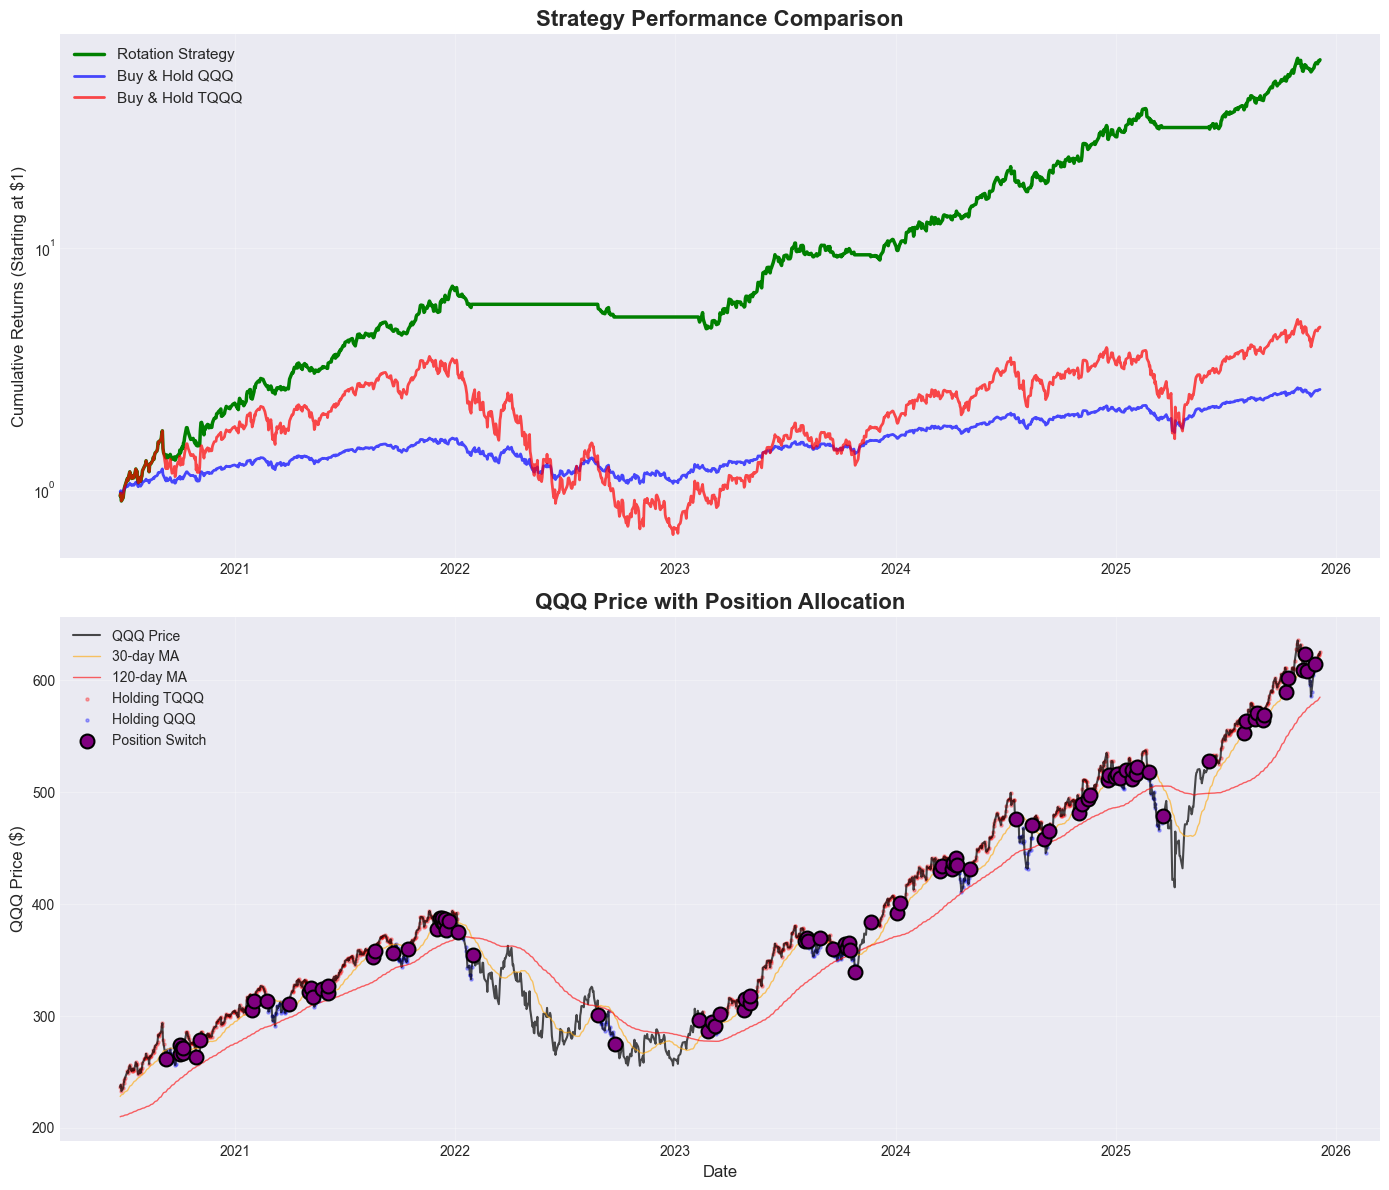


Final Portfolio Values (Starting with $10,000):
Rotation Strategy: $596,925.74
Buy & Hold QQQ:    $25,915.36
Buy & Hold TQQQ:   $46,973.21


In [10]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot 1: Cumulative returns comparison
axes[0].plot(df.index, df['Cumulative_Strategy'], 
             label='Rotation Strategy', linewidth=2.5, color='green')
axes[0].plot(df.index, df['Cumulative_QQQ'], 
             label='Buy & Hold QQQ', linewidth=2, color='blue', alpha=0.7)
axes[0].plot(df.index, df['Cumulative_TQQQ'], 
             label='Buy & Hold TQQQ', linewidth=2, color='red', alpha=0.7)
axes[0].set_title('Strategy Performance Comparison', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Cumulative Returns (Starting at $1)', fontsize=12)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_yscale('log')  # Log scale to see all strategies clearly

# Plot 2: QQQ price with position indicators
axes[1].plot(df.index, df['QQQ_Close'], label='QQQ Price', linewidth=1.5, color='black', alpha=0.7)
axes[1].plot(df.index, df['QQQ_SMA_30'], label='30-day MA', linewidth=1, color='orange', alpha=0.6)
axes[1].plot(df.index, df['QQQ_SMA_120'], label='120-day MA', linewidth=1, color='red', alpha=0.6)

# Highlight periods when holding TQQQ
tqqq_periods = df[df['Position'] == 1]
if len(tqqq_periods) > 0:
    axes[1].scatter(tqqq_periods.index, tqqq_periods['QQQ_Close'], 
                    color='red', s=5, alpha=0.3, label='Holding TQQQ')

# Highlight periods when holding QQQ
qqq_periods = df[df['Position'] == 0]
if len(qqq_periods) > 0:
    axes[1].scatter(qqq_periods.index, qqq_periods['QQQ_Close'], 
                    color='blue', s=5, alpha=0.3, label='Holding QQQ')

# Mark position switches
switches = df[df['Switch'] != 0]
axes[1].scatter(switches.index, switches['QQQ_Close'], 
                marker='o', color='purple', s=100, label='Position Switch', zorder=5, edgecolors='black', linewidths=1.5)

axes[1].set_title('QQQ Price with Position Allocation', fontsize=16, fontweight='bold')
axes[1].set_ylabel('QQQ Price ($)', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final portfolio values
initial_investment = 10000
print(f"\nFinal Portfolio Values (Starting with ${initial_investment:,}):")
print(f"Rotation Strategy: ${initial_investment * df['Cumulative_Strategy'].iloc[-1]:,.2f}")
print(f"Buy & Hold QQQ:    ${initial_investment * df['Cumulative_QQQ'].iloc[-1]:,.2f}")
print(f"Buy & Hold TQQQ:   ${initial_investment * df['Cumulative_TQQQ'].iloc[-1]:,.2f}")

## 8. Strategy Analysis & Next Steps

### Current Position Status

In [ ]:
# Current position and status
current_price = df['QQQ_Close'].iloc[-1]
current_ma30 = df['QQQ_SMA_30'].iloc[-1]
current_ma120 = df['QQQ_SMA_120'].iloc[-1]
current_holding = df['Holding'].iloc[-1]

print("=" * 60)
print("CURRENT POSITION STATUS")
print("=" * 60)
print(f"Current Date:     {df.index[-1].date()}")
print(f"QQQ Price:        ${current_price:.2f}")
print(f"30-day MA:        ${current_ma30:.2f} ({((current_price/current_ma30-1)*100):+.2f}%)")
print(f"120-day MA:       ${current_ma120:.2f} ({((current_price/current_ma120-1)*100):+.2f}%)")
print(f"\nCurrent Holding:  {current_holding}")
print("=" * 60)

# Calculate time in each position
position_counts = df['Holding'].value_counts()
total_days = len(df)
print(f"\nTime in each position:")
for pos, count in position_counts.items():
    print(f"  {pos}: {count} days ({count/total_days*100:.1f}%)")

# Show recent position history
print(f"\nRecent position changes:")
recent_switches = df[df['Switch'] != 0].tail(5)
for idx, row in recent_switches.iterrows():
    print(f"  {idx.date()}: Switched to {row['Holding']} at ${row['QQQ_Close']:.2f}")

### Ideas for Further Enhancement:
- **Transaction Costs**: Add brokerage fees and slippage to simulate real trading
- **Different MA Periods**: Optimize the 30 and 120-day periods for better performance
- **Additional Filters**: Add volume, RSI, or volatility filters to improve timing
- **Risk Management**: Implement stop-loss or position sizing rules
- **Tax Considerations**: Account for short-term vs long-term capital gains
- **Alternative Leveraged ETFs**: Test with other 2x or 3x leveraged instruments
- **Market Regime Detection**: Use volatility measures to adjust strategy parameters
- **Walk-Forward Analysis**: Test strategy robustness across different time periods